<a href="https://colab.research.google.com/github/afql88/Telco_customer_churn-_-IBM-dataset-_-GrupoC6/blob/main/Telco_churn_Grupo_C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momento de crítica de las hipótesis

**Grupo C6**

_Mauricio Castro_

_Carlos Sierra_

_Andrés F. QuiñoneS L_

* Realizar la etapa de entendimiento de los datos para identificar si los supuestos hechos en la hipótesis sobre ellos son reales.
* Estudiar con detenimiento los parámetros que deben ser estimados para poner a funcionar la técnica y verificar si se tienen los medios para hacer una estimación confiable.
* Establecer claramente cuál es la entrada y la salida del modelo y validar que la técnica esté en capacidad de recibir esa entrada y producir esa salida.
* Establecer si es posible hacer una evaluación objetiva de la hipótesis y anticipar cuáles serían las métricas recomendadas para ello.

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/afql88/Telco_customer_churn-_-IBM-dataset-_-GrupoC6/main/Telco_customer_churn%20_%20IBM%20dataset%20-%20CSV.csv"

data = pd.read_csv(url, delimiter=';', na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# La columna llamada 'Churn Value' es el atributo a predecir!!!!!

data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,...,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,...,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,...,Month-to-month,Yes,Electronic check,"99,65","820,5",Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,...,Month-to-month,Yes,Electronic check,"104,8","3046,05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,...,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",Yes,1,89,5340,Competitor had better devices


### CONOCIMIENTO DE LOS DATOS

In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape


(7043, 33)

In [3]:
data.dtypes

CustomerID           object
Count                 int64
Country              object
State                object
City                 object
Zip Code              int64
Lat Long             object
Latitude             object
Longitude            object
Gender               object
Senior Citizen       object
Partner              object
Dependents           object
Tenure Months         int64
Phone Service        object
Multiple Lines       object
Internet Service     object
Online Security      object
Online Backup        object
Device Protection    object
Tech Support         object
Streaming TV         object
Streaming Movies     object
Contract             object
Paperless Billing    object
Payment Method       object
Monthly Charges      object
Total Charges        object
Churn Label          object
Churn Value           int64
Churn Score           int64
CLTV                  int64
Churn Reason         object
dtype: object

In [4]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

1

In [5]:
data.describe()

,Count,Zip Code,Tenure Months,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,32.371149,0.265370,58.699418,4400.295755
std,0.0,1865.794555,24.559481,0.441561,21.525131,1183.057152
min,1.0,90001.000000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,9.000000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,29.000000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,55.000000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,72.000000,1.000000,100.000000,6500.000000


In [6]:


# Dividir los atributos en numéricos y categóricos
atributos_numericos = data.select_dtypes(include=['int'])
atributos_categoricos = data.select_dtypes(include=['object'])

# Calcular medidas de centralidad y dispersión para atributos numéricos
centralidad_numericos = atributos_numericos.describe()
dispersion_numericos = atributos_numericos.var()

# Calcular medidas de centralidad y dispersión para atributos categóricos
centralidad_categoricos = atributos_categoricos.describe()
# No se calcula dispersión para atributos categóricos, ya que no tienen una escala numérica

# Imprimir resultados
print("Medidas de centralidad para atributos numéricos:")
print(centralidad_numericos)

print("\nVarianza para atributos numéricos:")
print(dispersion_numericos)

print("\nMedidas de centralidad para atributos categóricos:")
print(centralidad_categoricos)




Medidas de centralidad para atributos numéricos:
        Count      Zip Code  Tenure Months  Churn Value  Churn Score  \
count  7043.0   7043.000000    7043.000000  7043.000000  7043.000000   
mean      1.0  93521.964646      32.371149     0.265370    58.699418   
std       0.0   1865.794555      24.559481     0.441561    21.525131   
min       1.0  90001.000000       0.000000     0.000000     5.000000   
25%       1.0  92102.000000       9.000000     0.000000    40.000000   
50%       1.0  93552.000000      29.000000     0.000000    61.000000   
75%       1.0  95351.000000      55.000000     1.000000    75.000000   
max       1.0  96161.000000      72.000000     1.000000   100.000000   

              CLTV  
count  7043.000000  
mean   4400.295755  
std    1183.057152  
min    2003.000000  
25%    3469.000000  
50%    4527.000000  
75%    5380.500000  
max    6500.000000  

Varianza para atributos numéricos:
Count            0.000000e+00
Zip Code         3.481189e+06
Tenure Months    

In [7]:
data.mode()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0002-ORFBO,1.0,United States,California,Los Angeles,90001.0,"32.555828, -117.040073","32,555828","-121,994813",Male,...,Month-to-month,Yes,Electronic check,"20,05",,No,0.0,80.0,5546.0,Attitude of support person
1,0003-MKNFE,NaN,NaN,NaN,NaN,90002.0,"32.578103, -117.012975","32,578103",NaN,NaN,...,NaN,NaN,NaN,NaN,"20,2",NaN,NaN,NaN,NaN,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,90003.0,"32.579134, -117.119009","32,579134",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,90004.0,"32.587557, -116.636816","32,587557",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,90005.0,"32.605012, -116.97595","32,605012",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


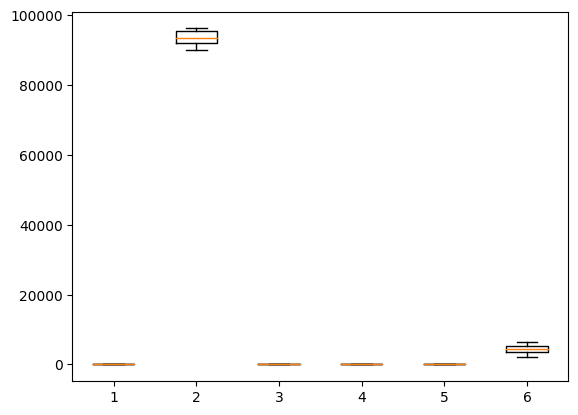

In [8]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Count'],data['Zip Code'],data['Tenure Months'],data['Churn Value'],data['Churn Score'],
data['CLTV']))

plt.show()

In [9]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

# Se convierten atributos categóricos a valores numéricos
labelencoder = LabelEncoder()
data['CustomerID'] = labelencoder.fit_transform(data['CustomerID'])
data['Country'] = labelencoder.fit_transform(data['Country'])
data['State'] = labelencoder.fit_transform(data['State'])
data['City'] = labelencoder.fit_transform(data['City'])
data['Lat Long'] = labelencoder.fit_transform(data['Lat Long'])
data['Latitude'] = labelencoder.fit_transform(data['Latitude'])
data['Longitude'] = labelencoder.fit_transform(data['Longitude'])
data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Senior Citizen'] = labelencoder.fit_transform(data['Senior Citizen'])
data['Partner'] = labelencoder.fit_transform(data['Partner'])
data['Dependents'] = labelencoder.fit_transform(data['Dependents'])
data['Phone Service'] = labelencoder.fit_transform(data['Phone Service'])
data['Multiple Lines'] = labelencoder.fit_transform(data['Multiple Lines'])
data['Internet Service'] = labelencoder.fit_transform(data['Internet Service'])
data['Online Security'] = labelencoder.fit_transform(data['Online Security'])
data['Online Backup'] = labelencoder.fit_transform(data['Online Backup'])
data['Device Protection'] = labelencoder.fit_transform(data['Device Protection'])
data['Tech Support'] = labelencoder.fit_transform(data['Tech Support'])
data['Streaming TV'] = labelencoder.fit_transform(data['Streaming TV'])
data['Streaming Movies'] = labelencoder.fit_transform(data['Streaming Movies'])
data['Contract'] = labelencoder.fit_transform(data['Contract'])
data['Paperless Billing'] = labelencoder.fit_transform(data['Paperless Billing'])
data['Payment Method'] = labelencoder.fit_transform(data['Payment Method'])
data['Monthly Charges'] = labelencoder.fit_transform(data['Monthly Charges'])
data['Total Charges'] = labelencoder.fit_transform(data['Total Charges'])
data['Churn Label'] = labelencoder.fit_transform(data['Churn Label'])

data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2564,1,0,0,562,90003,327,327,502,1,...,0,1,3,740,157,1,1,86,3239,Competitor made better offer
1,6511,1,0,0,562,90005,405,405,518,0,...,0,1,2,1033,925,1,1,67,2701,Moved
2,6551,1,0,0,562,90006,393,393,512,0,...,0,1,2,1578,6104,1,1,86,5372,Moved
3,5604,1,0,0,562,90010,410,410,528,0,...,0,1,2,90,2646,1,1,84,5003,Moved
4,174,1,0,0,562,90015,385,385,500,1,...,0,1,0,68,4265,1,1,89,5340,Competitor had better devices


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


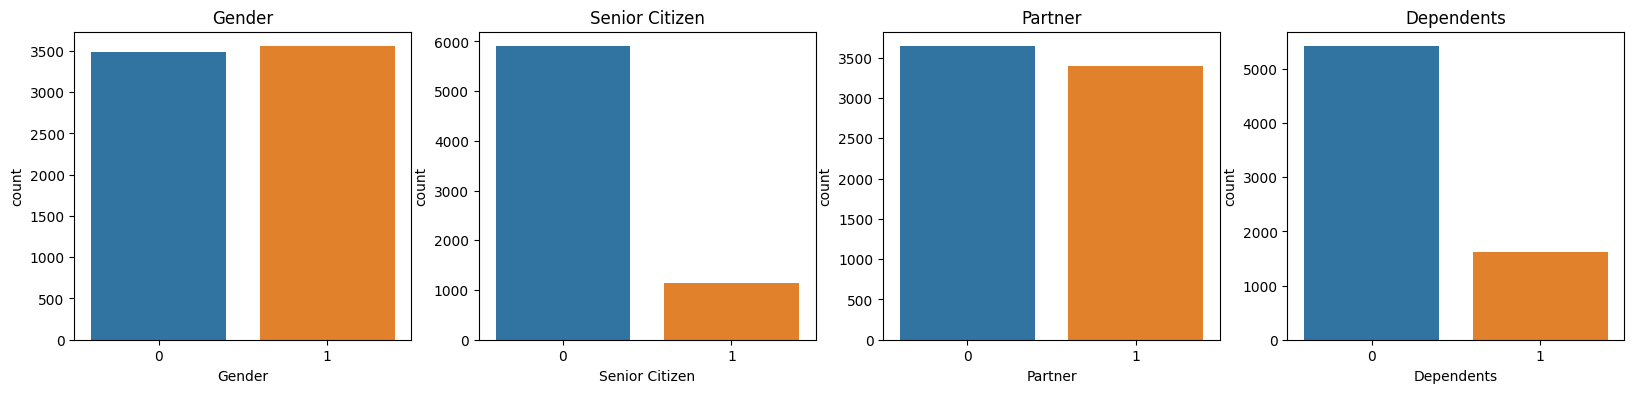

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["Gender","Senior Citizen","Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=data)
    ax.set_title(f"{col}")

print(data.columns)

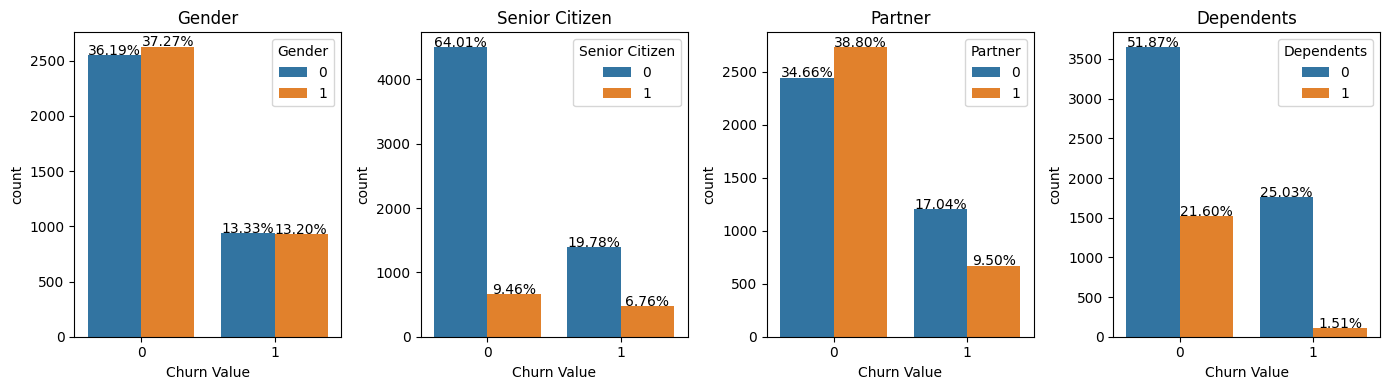

In [12]:
cols = ["Gender","Senior Citizen","Partner","Dependents"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn Value", hue=str(col), data=data)

    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

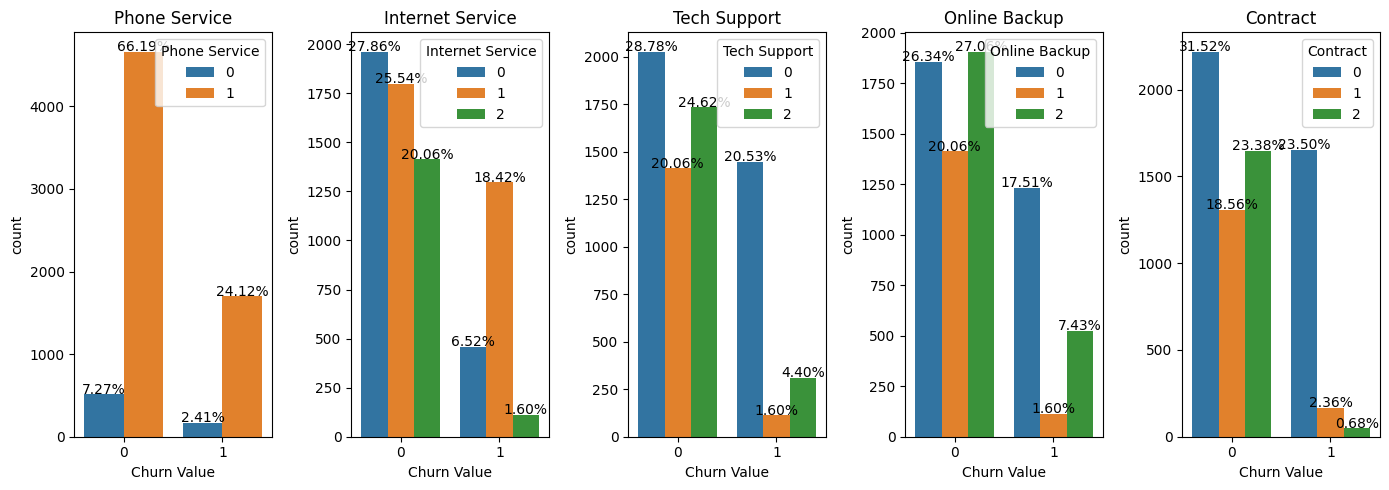

In [13]:
cols = ['Phone Service','Internet Service',"Tech Support","Online Backup","Contract"]

plt.figure(figsize=(14,5))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn Value", hue=str(col), data=data)

    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

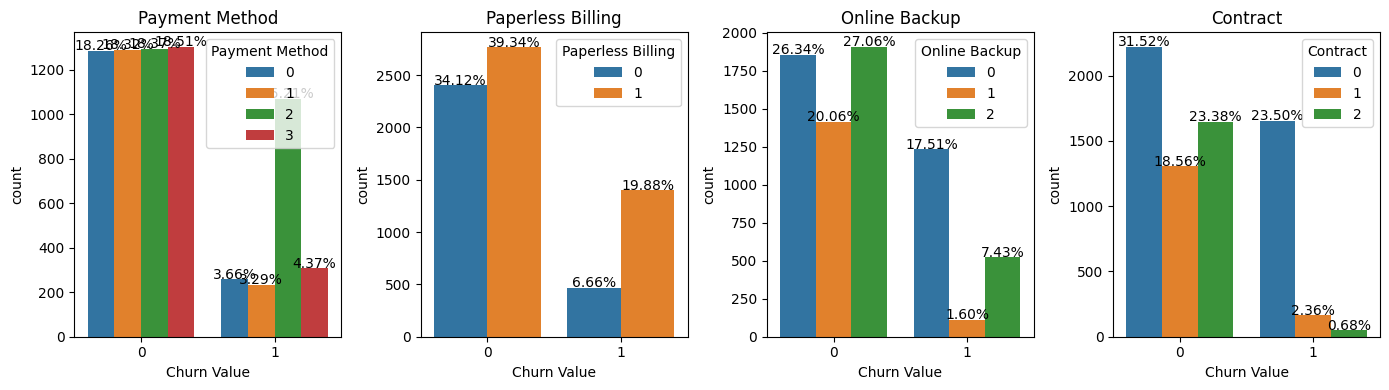

In [14]:
cols = ['Payment Method',"Paperless Billing","Online Backup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x="Churn Value", hue=str(col), data=data)

    # Calcula porcentajes y añade etiquetas
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")

    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

In [15]:
# No encontramos (en la base trabajada) datos faltantes [aparentemente] - Sin embargo...: eliminamos filas y columnas según lo observado.

# Se borran por que aportan en nada al analisis
data.drop("CustomerID", axis=1, inplace=True)
data.drop("Churn Reason", axis=1, inplace=True)

### PREPARACIóN DE LOS DATOS

In [16]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['Churn Value'].value_counts())

0    5174
1    1869
Name: Churn Value, dtype: int64


In [17]:
print(data['Multiple Lines'].value_counts())

0    3390
2    2971
1     682
Name: Multiple Lines, dtype: int64


In [18]:

data['Multiple Lines'].replace(to_replace='No phone service',  value='No', inplace=True)
data['Online Security'].replace(to_replace='No internet service',  value='No', inplace=True)
data['Online Backup'].replace(to_replace='No internet service',  value='No', inplace=True)
data['Device Protection'].replace(to_replace='No internet service',  value='No', inplace=True)
data['Tech Support'].replace(to_replace='No internet service',  value='No', inplace=True)
data['Streaming TV'].replace(to_replace='No internet service',  value='No', inplace=True)
data['Streaming Movies'].replace(to_replace='No internet service',  value='No', inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['Multiple Lines'] = labelencoder.fit_transform(data['Multiple Lines'])
data['Partner'] = labelencoder.fit_transform(data['Partner'])
data['Dependents'] = labelencoder.fit_transform(data['Dependents'])
data['Phone Service'] = labelencoder.fit_transform(data['Phone Service'])
data['Paperless Billing'] = labelencoder.fit_transform(data['Paperless Billing'])
data['Churn Value'] = labelencoder.fit_transform(data['Churn Value'])
data['Churn Score'] = labelencoder.fit_transform(data['Churn Score'])
data['Online Security'] = labelencoder.fit_transform(data['Online Security'])
data['Online Backup'] = labelencoder.fit_transform(data['Online Backup'])
data['Device Protection'] = labelencoder.fit_transform(data['Device Protection'])
data['Tech Support'] = labelencoder.fit_transform(data['Tech Support'])
data['Streaming TV'] = labelencoder.fit_transform(data['Streaming TV'])
# Aunque son categoricas se pasan a binario
data['Payment Method'] = labelencoder.fit_transform(data['Payment Method'])
data['Contract'] = labelencoder.fit_transform(data['Contract'])
data['Internet Service'] = labelencoder.fit_transform(data['Internet Service'])
data.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,0,0,562,90003,327,327,502,1,0,...,0,0,1,3,740,157,1,1,70,3239
1,1,0,0,562,90005,405,405,518,0,0,...,0,0,1,2,1033,925,1,1,51,2701
2,1,0,0,562,90006,393,393,512,0,0,...,2,0,1,2,1578,6104,1,1,70,5372
3,1,0,0,562,90010,410,410,528,0,0,...,2,0,1,2,90,2646,1,1,68,5003
4,1,0,0,562,90015,385,385,500,1,0,...,2,0,1,0,68,4265,1,1,73,5340


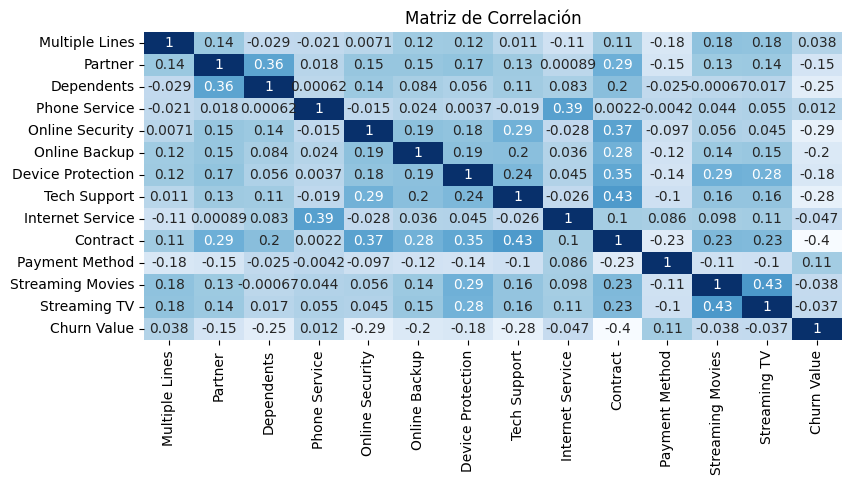

In [20]:

variables_entrada = ['Multiple Lines', 'Partner', 'Dependents', 'Phone Service',
                     'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                     'Internet Service',  'Contract',  'Payment Method',
                     'Streaming Movies', 'Streaming TV','Churn Value']
matriz_correlacion = data[variables_entrada].corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(9, 4))
sns.heatmap(matriz_correlacion, annot=True, cbar=False, cmap="Blues")
plt.title("Matriz de Correlación")
plt.show()

Se eliminan las variables categoricas para el modelo

In [21]:
data_model = data.drop(['Total Charges','Monthly Charges','Senior Citizen','Tenure Months'],axis=1)

data_model.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Partner,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Value,Churn Score,CLTV
0,1,0,0,562,90003,327,327,502,1,0,...,0,0,0,0,1,3,1,1,70,3239
1,1,0,0,562,90005,405,405,518,0,0,...,0,0,0,0,1,2,1,1,51,2701
2,1,0,0,562,90006,393,393,512,0,0,...,0,2,2,0,1,2,1,1,70,5372
3,1,0,0,562,90010,410,410,528,0,1,...,2,2,2,0,1,2,1,1,68,5003
4,1,0,0,562,90015,385,385,500,1,0,...,0,2,2,0,1,0,1,1,73,5340


In [22]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('Churn Value')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

Count  Country  State  City  Zip Code  Lat Long  Latitude  \
Churn Value                                                                   
0           0         1        0      0   717     93646       808       808   
            1         1        0      0    60     92220       309       309   
            2         1        0      0   222     94925      1125      1125   
            3         1        0      0  1075     95736      1399      1399   
            4         1        0      0   707     92259        21        21   
...                 ...      ...    ...   ...       ...       ...       ...   
1           1864      1        0      0   829     91335       539       539   
            1865      1        0      0  1115     95776      1340      1340   
            1866      1        0      0   525     90260       276       276   
            1867      1        0      0   871     91340       579       579   
            1868      1        0      0   721     94563      1108      1108   

                  Longitude  Gender  Senior Citizen  ...  Streaming Movies  \
Churn Value                                          ...                     
0           0           719       0               0  ...                 0   
            1            82       0               0  ...                 2   
            2          1482       0               0  ...                 2   
            3           996       0               0  ...                 0   
            4            22       0               0  ...                 0   
...                     ...     ...             ...  ...               ...   
1           1864        620       1               1  ...                 2   
            1865       1186       0               0  ...                 0   
            1866        547       1               0  ...                 2   
            1867        594       1               0  ...                 2   
            1868       1364       1               0  ...                 0   

                  Contract  Paperless Billing  Payment Method  \
Churn Value                                                     
0           0            0                  1               3   
            1            1                  1               2   
            2            2                  0               0   
            3            1                  0               0   
            4            2                  1               2   
...                    ...                ...             ...   
1           1864         0                  1               2   
            1865         0                  1               3   
            1866         0                  1               2   
            1867         0                  1               2   
            1868         0                  1               2   

                  Monthly Charges  Total Charges  Churn Label  Churn Value  \
Churn Value                                                                  
0           0                1291           1714            0            0   
            1                 758           1984            0            0   
            2                1356           5132            0            0   
            3                 814           3969            0            0   
            4                 842           3412            0            0   
...                           ...            ...          ...          ...   
1           1864              577           3658            1            1   
            1865              765            974            1            1   
            1866             1513            283            1            1   
            1867              687           4227            1            1   
            1868             1295           6178            1            1   

                  Churn Score  CLTV  
Churn Value                          
0           0               7  4874  


In [23]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['Churn Value'].value_counts())

0    1869
1    1869
Name: Churn Value, dtype: int64


# Prueba de modelado

**Consideramos que las dos hipótesis a trabajar serán:**

* Regresión logística
Hipótesis_1: La antigüedad del cliente (tenure) tiene una relación directa con la probabilidad de abandono. Los clientes nuevos son más propensos a abandonar que los que llevan más tiempo con la compañía.

Este se utiliza como modelo base con efectos de comparación.


* Random forest
Hipótesis_2: La combinación de características como el tipo de contrato, la antigüedad y los servicios adicionales (como StreamingTV o TechSupport) pueden predecir con precisión la probabilidad de abandono.

Esta es una muy buena opción toda vez que, estos modelos son los mejores para trabajo con datos tabulares (categóricos y numéricos) y con datos desbalanceados. En este caso se estima una precisiónd del 1.0.


Los que NO utilizaremos:

* Redes neuronales: no son buenas para resolver datos tabulares.

* SVM: no se utilizó dado que los dos modelos usados ofrecen mejor precisión desde nuestra práctica.



In [24]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

# Elimina el espacio en el nombre de la columna 'Churn Value'
dataBal = dataBal.rename(columns={'Churn Value': 'Churn_Value'})

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('Churn_Value', axis=1), dataBal.Churn_Value, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2616, 30) (2616,)
(1122, 30) (1122,)


In [25]:
# Entrenamiento del modelo de clasificación por **regresión logística**
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

# Identifica las columnas categóricas
categorical_cols = ['Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']

# Aplica codificación One-Hot a las columnas categóricas
encoder = OneHotEncoder()
X_train_encoded = X_train.copy()  # Asegúrate de trabajar con una copia de tus datos de entrenamiento
X_train_encoded = pd.get_dummies(X_train_encoded, columns=categorical_cols)

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [26]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [27]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9037433155080213

# Ahora aplicamos Random Forest como prueba

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear una instancia del clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=500, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Imprimir un reporte de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       564

    accuracy                           1.00      1122
   macro avg       1.00      1.00      1.00      1122
weighted avg       1.00      1.00      1.00      1122



# Fin del programa!!!